## Table of Contents<a id="top"></a>
   
### 1.	[Text Data Processing](#part1) 
   - [1.1 Load the Text Data](#part1.1)
   - [1.2 Data Cleansing](#part1.2)
   - [1.3 Bag-Of-Word](#part1.3)
   - [1.4 TF-IDF](#part1.4)


### 2.  [Text Data Understanding](#part2)
   - [2.1 KeyWords Extraction](#part2.1)
   - [2.2 Visualising the Data](#part2.2)
   - [2.2 Data Encoding](#part2.3)
   - [2.2 Association Rule Mining](#part2.4)
       - [2.4.1  Confidence Thresold](#part2.4.1)
       
       - [2.4.2 Lift Thresold](#part2.4.2)
       
       - [2.4.3 Confidence & Lift Thresold](#part2.4.3)

### 3.  [Problem 2 (Group 2 Classification Modelling)](#part3)
   - [3.1 Sample the Data](#part3.1)
   - [3.2 Build the Models](#part3.2)
   - [3.3 Evaluation & Improvement of Models](#part3.3)
       - [3.3.1  Text Counts](#part3.3.1)
       
       - [3.3.2 TF-IDF](#part3.3.2)

In [1]:
# import the required packages

#BASIC
import numpy as np
import pandas as pd
import matplotlib
import requests

#Text Data Processing
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Visualizations
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Text Data Understanding
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

#Train Test Split
from sklearn.model_selection import train_test_split 

#Classification Model
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#GridSearch
from sklearn.model_selection import GridSearchCV

#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Problem1

## 1. Text Data Preprocessing<a id="part1"></a>
[Back to top](#top)

### 1.1 Load the Text Data<a id="part1.1"></a>
[Back to top](#top)

In [2]:
df=pd.read_csv('reddit_5.csv')
df.shape

(5000, 2)

In [3]:
df.head()

,text,category
0,This is just an hypothesis on how I imagine an...,soccer
1,"Hey community, I want to get your opinion on w...",snowboarding
2,I have a roubaix road bike with aero bars and ...,triathlon
3,Out of the u17 World Cup winners “top prospect...,soccer
4,A while ago I quit Judo and since then I've da...,judo


In [4]:
df.category.unique()

array(['soccer', 'snowboarding', 'triathlon', 'judo', 'surfing'],
      dtype=object)

### 1.2 Cleanse the Text Data<a id="part1.2"></a>
[Back to top](#top)

In [5]:
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("</?.*?>"," <> ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W|_)+"," ",text)
    
    return text

def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)

#load a set of stop words
stopwords=list(get_stop_words("stopwords.txt"))

text_df = df['text'].apply(lambda x:pre_process(x))

In [6]:
text_df[0]

'this is just an hypothesis on how i imagine an european league with the relegation of just one team champions league is the main league and consists of teams at the time of writing the first teams of uefa ranking real madrid cf club atlético de madrid fc barcelona fc bayern münchen juventus sevilla fc paris saint germain manchester city fc borussia dortmund sl benfica arsenal fc ssc napoli fc porto chelsea fc manchester united fc bayer leverkusen fc shakhtar donetsk fc zenit fc schalke tottenham hotspur fc at the end of regular season teams placed from to qualify for play off which will determine the european champion with a final game teams placed from to will do play out a final game will determine the team that relegates only one team relegates relegated team will go back and play in its national league premier serie a etc uefa league second tier consists only of teams that win their national leagues sort of old champions cup the winner of uefa league will play next season in champ

### 1.3 Bag-of-Word<a id="part1.3"></a>
[Back to top](#top)

In [7]:
#create a vocabulary of words, 
#ignore words that appear in 15% of documents, 
#eliminate stop words

count_vect = CountVectorizer(max_df=0.85, stop_words=stopwords, max_features=5000)
text_counts = count_vect.fit_transform(text_df)

In [8]:
text_counts.shape

(5000, 5000)

In [9]:
sum_words = text_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [10]:
print('The highest frequency words:')
words_freq[0:20] 

The highest frequency words:


[('ve', 2148),
 ('am', 2015),
 ('time', 1934),
 ('com', 1730),
 ('sprite', 1576),
 ('https', 1569),
 ('judo', 1533),
 ('don', 1320),
 ('board', 1317),
 ('icon', 1315),
 ('looking', 1208),
 ('training', 1205),
 ('bike', 1172),
 ('www', 1086),
 ('thanks', 1078),
 ('season', 1006),
 ('people', 934),
 ('week', 854),
 ('league', 842),
 ('guys', 839)]

In [11]:
print('The lowest frequency words:') 
words_freq[-20:] 

The lowest frequency words:


[('dzeko', 8),
 ('pinning', 8),
 ('piszczek', 8),
 ('pablo', 8),
 ('editing', 8),
 ('dominic', 8),
 ('mccarthy', 8),
 ('mo', 8),
 ('dost', 8),
 ('maine', 8),
 ('mali', 8),
 ('exeter', 8),
 ('emailed', 8),
 ('corona', 8),
 ('gfc', 8),
 ('paicmhsc', 8),
 ('heung', 8),
 ('independence', 8),
 ('lewis', 8),
 ('lamia', 8)]

In [12]:
count_vect.get_feature_names_out()

array(['aaron', 'abilities', 'ability', ..., 'ádám', 'álvaro', 'ángel'],
      dtype=object)

In [13]:
feature_names=np.array(count_vect.get_feature_names_out())
len(count_vect.get_feature_names_out())

5000

In [14]:
pd.DataFrame(text_counts.toarray())

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.4 TF-IDF<a id="part1.4"></a>
[Back to top](#top)

In [15]:
# Generate TF-IDF matrix
tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)
text_tfidf = tfidf_transformer.fit_transform(text_counts)

In [16]:
tfidf_transformer.idf_

array([7.32016859, 6.80934297, 5.49204148, ..., 8.41878088, 7.7256337 ,
       7.57148302])

In [17]:
tfidf_transformer.idf_.shape

(5000,)

In [18]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['ve' 'time' 'am' 'thanks' 'don' 'looking' 'com' 'guys' 'training'
 'people' 'judo' 'board' 'doing' 'https' 'week' 'pretty' 'getting' 'lot'
 'www' 'season' 'll' 'feel' 'day' 'hey' 'help' 'bike' 'days' 'little'
 'trying' 'bit' 'advice' 'surfing' 'surf' 'http' 're' 'wondering' 'able'
 'start' 'run' 'experience' 'team' 'ride' 'love' 'months' 'edit'
 'thinking' 'started' 'times' 'try' 'hi' 'maybe' 'look' 'probably' 'top'
 'etc' 'question' 'club' 'league' 'goal' 'half' 'ago' 'weeks' 'didn'
 'live' 'hard' 'currently' 'couple' 'recently' 'water' 'trip' 'post'
 'riding' 'found' 'triathlon' 'past' 'won' 'fun' 'watch' 'waves' 'race'
 'else' 'game' 'swim' 'match' 'tips' 'snowboarding' 'th' 'tri' 'doesn'
 'running' 'appreciated' 'teams' 'football' 'city' 'real' 'players'
 'train' 'bad' 'coming' 'world']


In [19]:
pd.DataFrame(text_tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.205825,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.141878
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4996,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4997,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4998,0.0,0.0,0.000000,0.065526,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [20]:
# find maximum value for each of the features over dataset:
max_value = text_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['gameid' 'zaza' 'donetsk' 'shakhtar' 'courtesy' 'livesoccertv' 'mina'
 'rakitic' 'eduardo' 'toulouse' 'mohamed' 'ingolstadt' 'etihad' 'romelu'
 'navas' 'midblue' 'eder' 'gemifra' 'cest' 'commons']
Features with highest tfidf: 
['shark' 'draw' 'predictions' 'prediction' 'amp' 'fcb' 'tottenham'
 'profit' 'bar' 'sumo' 'gt' 'position' 'winners' 'forums' 'kata' 'pts'
 'commute' 'icon' 'iceland' 'sprite']


## 2. Text Data Understanding<a id="part2"></a>
[Back to top](#top)

### 2.1 Extract keywords using TF-IDF matrix<a id="part2.1"></a>
[Back to top](#top)

In [21]:
topn = 5
results =[]

In [22]:
for idx, doc in text_df.items():
    #generate tf-idf for the given document
    tf_idf_vector=text_tfidf[idx]
    
    temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending = False, inplace = True)
    
    #use only topn items from vector
     
    topn_items = temp[:topn]

    tf_idf = []
    word = []

    for index, row in topn_items.iterrows():
        #print(int(row['feature_number']))
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        tf_idf.append(round(row['tf_idf'], 3))

    result = dict(zip(word, tf_idf))
    
    results.append(result)

In [23]:
len(results)

5000

In [24]:
df['cleansed_review'] = text_df
df['keywords'] = results
df.head()

,text,category,cleansed_review,keywords
0,This is just an hypothesis on how I imagine an...,soccer,this is just an hypothesis on how i imagine an...,"{'fc': 0.578, 'league': 0.371, 'teams': 0.277,..."
1,"Hey community, I want to get your opinion on w...",snowboarding,hey community i want to get your opinion on wh...,"{'vail': 0.482, 'beaver': 0.277, 'creek': 0.25..."
2,I have a roubaix road bike with aero bars and ...,triathlon,i have a roubaix road bike with aero bars and ...,"{'pros': 0.352, 'helmet': 0.323, 'opportunity'..."
3,Out of the u17 World Cup winners “top prospect...,soccer,out of the u world cup winners top prospects w...,"{'careers': 0.412, 'nelson': 0.279, 'winners':..."
4,A while ago I quit Judo and since then I've da...,judo,a while ago i quit judo and since then i ve da...,"{'judo': 0.435, 'submissions': 0.26, 'lastly':..."


In [25]:
df.keywords

0       {'fc': 0.578, 'league': 0.371, 'teams': 0.277,...
1       {'vail': 0.482, 'beaver': 0.277, 'creek': 0.25...
2       {'pros': 0.352, 'helmet': 0.323, 'opportunity'...
3       {'careers': 0.412, 'nelson': 0.279, 'winners':...
4       {'judo': 0.435, 'submissions': 0.26, 'lastly':...
                              ...                        
4995    {'walking': 0.446, 'hostels': 0.286, 'puerto':...
4996    {'bbc': 0.455, 'streamable': 0.382, 'https': 0...
4997    {'cf': 0.533, 'dropped': 0.3, 'gd': 0.23, 'spr...
4998    {'ns': 0.288, 'ci': 0.271, 'forgiving': 0.271,...
4999    {'computer': 0.608, 'watch': 0.352, 'bike': 0....
Name: keywords, Length: 5000, dtype: object

In [26]:
#use only topn items from vector
topn =5    
topn_items = temp[:topn]

tf_idf = []
word = []

for index, row in topn_items.iterrows():
    fname = feature_names[int(row['feature_number'])]
    word.append(fname)
    tf_idf.append(round(row['tf_idf'], 3))  

In [27]:
print(doc, '\n')

result = dict(zip(word, tf_idf))
print(result)

hello triathletes i don t have a fitness watch and i don t have a bike computer i would like to track my swims bike rides and runs in conjunction with the appropriate senors hrm power meter etc a watch such as the garmin tracks all disciplines points to the watch a bike computer such as the wahoo bolt only tracks bike rides point to the computer if a watch can track all disciplines while the bike computer can only track is there any reason to get both side note i am aware of the following you can mount the watch to handlebars wouldn t really be a fan of that and would rather keep it on my wrist inconvenience of looking at your wrist while biking cycle computer offers a bigger screen any input would be great trying to figure out if i buy the watch if i should still consider the bike computer thank you  

{'computer': 0.608, 'watch': 0.352, 'bike': 0.307, 'track': 0.25, 'disciplines': 0.218}


### 2.2 Visualising the Data<a id="part2.2"></a>
[Back to top](#top)

In [28]:
result

{'computer': 0.608,
 'watch': 0.352,
 'bike': 0.307,
 'track': 0.25,
 'disciplines': 0.218}

In [29]:
df.keywords[0]

{'fc': 0.578,
 'league': 0.371,
 'teams': 0.277,
 'play': 0.204,
 'national': 0.201}

In [30]:
grouped_df = df.groupby('category')['cleansed_review'].apply(lambda x: ' '.join(x.dropna())).reset_index()

In [31]:
full_list = df['keywords'].apply(lambda x: pd.Series(list(x.keys())))
full_list

,0,1,2,3,4
0,fc,league,teams,play,national
1,vail,beaver,creek,keystone,utah
2,pros,helmet,opportunity,decide,aero
3,careers,nelson,winners,ability,pace
4,judo,submissions,lastly,choke,favourite
...,...,...,...,...,...
4995,walking,hostels,puerto,value,safety
4996,bbc,streamable,https,com,mkhitaryan
4997,cf,dropped,gd,sprite,fc
4998,ns,ci,forgiving,joe,shortboard


In [32]:
full_list.shape

(5000, 5)

In [33]:
new_list=pd.Series([])
for col in full_list:
    new_list = new_list.append(full_list[col].dropna())
print(new_list)

0                fc
1              vail
2              pros
3           careers
4              judo
           ...     
4995         safety
4996     mkhitaryan
4997             fc
4998     shortboard
4999    disciplines
Length: 25000, dtype: object


C:\Users\ambkr\AppData\Local\Temp\ipykernel_41668\1782873753.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_list=pd.Series([])
C:\Users\ambkr\AppData\Local\Temp\ipykernel_41668\1782873753.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_list = new_list.append(full_list[col].dropna())
C:\Users\ambkr\AppData\Local\Temp\ipykernel_41668\1782873753.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_list = new_list.append(full_list[col].dropna())
C:\Users\ambkr\AppData\Local\Temp\ipykernel_41668\1782873753.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_list = new_list.append(full_li

### Frequency of Most Popular Items

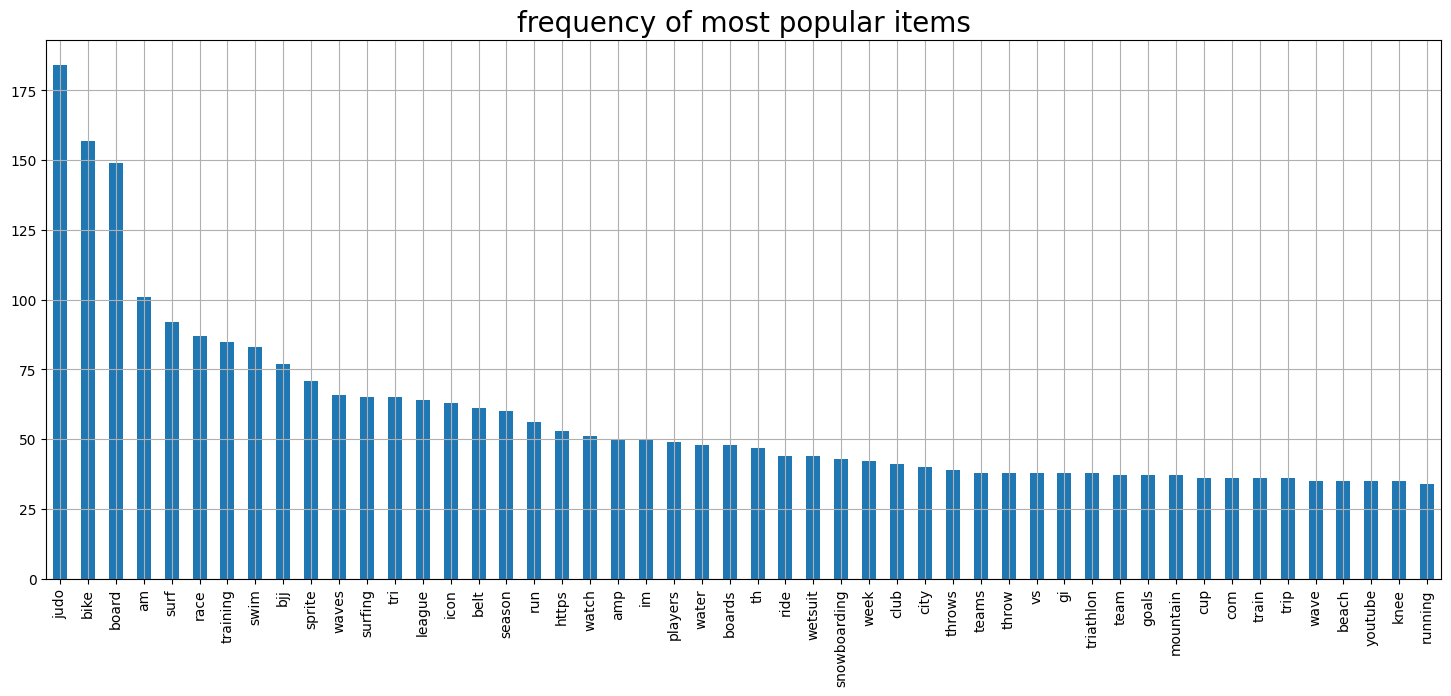

In [34]:
# looking at the frequency of most popular items 
plt.figure(figsize=(18,7))
new_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [35]:
y = new_list.value_counts().head(50).to_frame()
y.index

Index(['judo', 'bike', 'board', 'am', 'surf', 'race', 'training', 'swim',
       'bjj', 'sprite', 'waves', 'surfing', 'tri', 'league', 'icon', 'belt',
       'season', 'run', 'https', 'watch', 'amp', 'im', 'players', 'water',
       'boards', 'th', 'ride', 'wetsuit', 'snowboarding', 'week', 'club',
       'city', 'throws', 'teams', 'throw', 'vs', 'gi', 'triathlon', 'team',
       'goals', 'mountain', 'cup', 'com', 'train', 'trip', 'wave', 'beach',
       'youtube', 'knee', 'running'],
      dtype='object')

### Wordclouds

C:\Users\ambkr\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


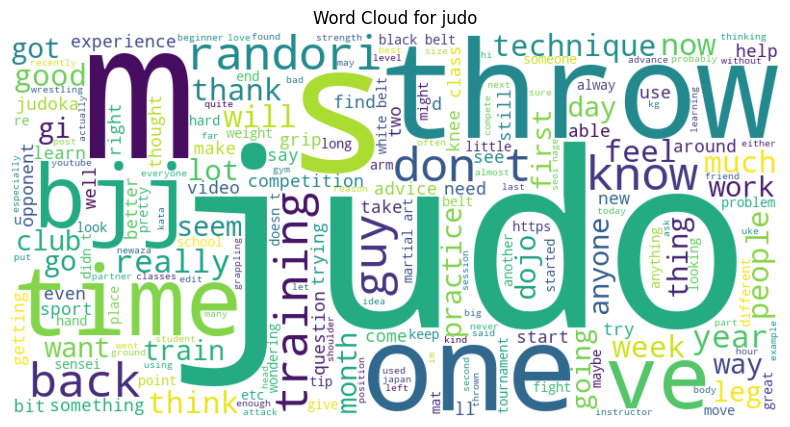

C:\Users\ambkr\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


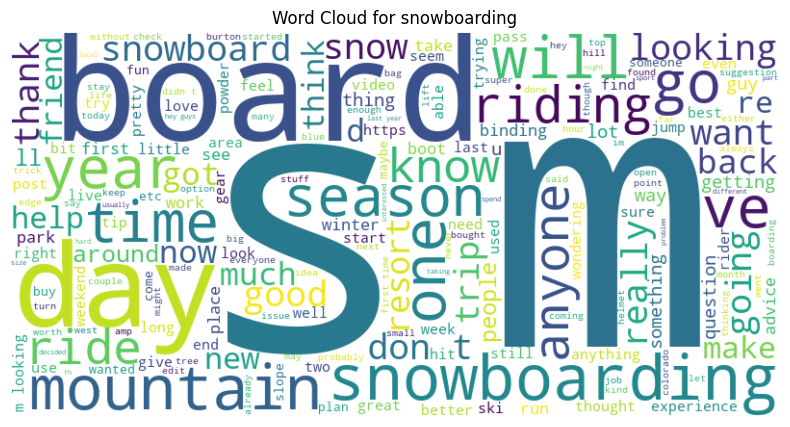

C:\Users\ambkr\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


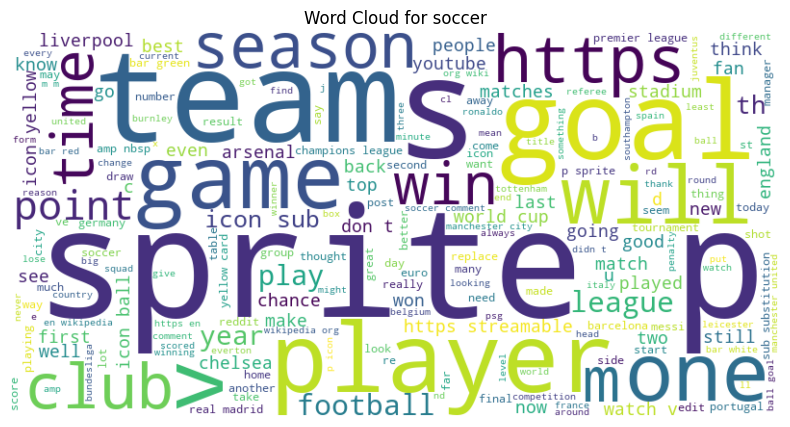

C:\Users\ambkr\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


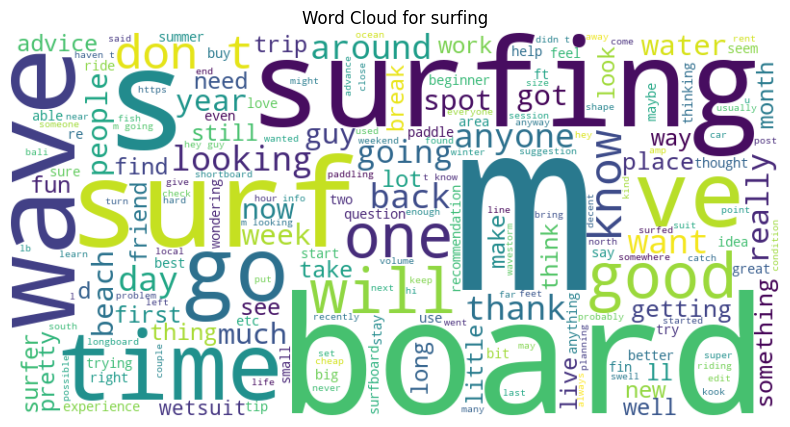

C:\Users\ambkr\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


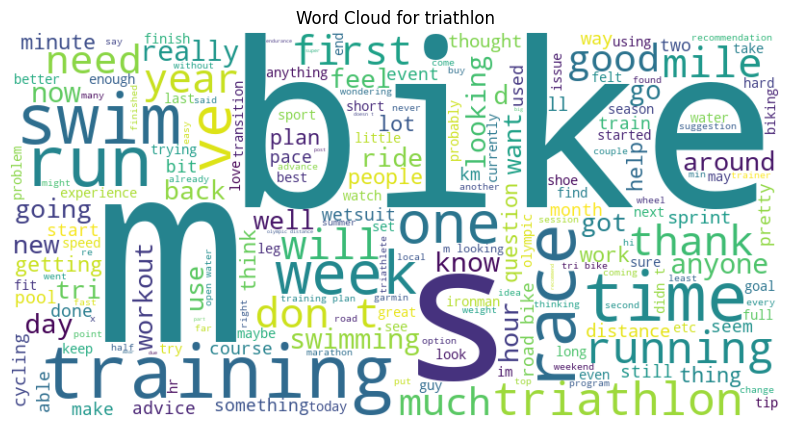

In [36]:
for index, row in grouped_df.iterrows():
    category = row['category']
    text = row['cleansed_review']
    
    # Create a WordCloud object and generate the word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category}')
    plt.show()

### 2.3 Data Encoding<a id="part2.3"></a>
[Back to top](#top)

In [37]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 5000):
    trans.append([str(full_list.values[i,j]) for j in range(0, 5)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(5000, 5)


In [38]:
print(trans)

[['fc' 'league' 'teams' 'play' 'national']
 ['vail' 'beaver' 'creek' 'keystone' 'utah']
 ['pros' 'helmet' 'opportunity' 'decide' 'aero']
 ...
 ['cf' 'dropped' 'gd' 'sprite' 'fc']
 ['ns' 'ci' 'forgiving' 'joe' 'shortboard']
 ['computer' 'watch' 'bike' 'track' 'disciplines']]


In [39]:
#Transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array
te = TransactionEncoder()
data_encoded = te.fit_transform(trans)
data_encoded = pd.DataFrame(data_encoded, columns = te.columns_)

# getting the shape of the data
data_encoded.shape

(5000, 4718)

In [40]:
data_encoded

,abilities,ability,able,abroad,absolute,absolutely,ac,academies,academy,accept,...,zenit,zero,zidane,zipp,zlatan,zone,zones,zoot,ádám,álvaro
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
# getting correlations for 4718 items would be messy 
# so let's reduce the items from 4718 to 50

data_encoded = data_encoded.loc[:, y.index]

# checking the shape
data_encoded.shape

(5000, 50)

In [42]:
data_encoded

,judo,bike,board,am,surf,race,training,swim,bjj,sprite,...,mountain,cup,com,train,trip,wave,beach,youtube,knee,running
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
help(apriori)

Help on function apriori in module mlxtend.frequent_patterns.apriori:

apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)
    Get frequent itemsets from a one-hot DataFrame
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame the encoded format. Also supports
      DataFrames with sparse data; for more info, please
      see (https://pandas.pydata.org/pandas-docs/stable/
           user_guide/sparse.html#sparse-data-structures)
    
      Please note that the old pandas SparseDataFrame format
      is no longer supported in mlxtend >= 0.17.2.
    
      The allowed values are either 0/1 or True/False.
      For example,
    
    ```
             Apple  Bananas   Beer  Chicken   Milk   Rice
        0     True    False   True     True  False   True
        1     True    False   True    False  False   True
        2     True    False   True    False  False  False
        3     True     True  False    False  False  Fa

In [44]:
#First, let us return the items and itemsets with at least 1% support:
frequent_itemsets=apriori(data_encoded, min_support = 0.003, use_colnames = True)

In [45]:
frequent_itemsets

,support,itemsets
0,0.0368,(judo)
1,0.0314,(bike)
2,0.0298,(board)
3,0.0202,(am)
4,0.0184,(surf)
5,0.0174,(race)
6,0.0170,(training)
7,0.0166,(swim)
8,0.0154,(bjj)
9,0.0142,(sprite)


In [46]:
frequent_itemsets[['support']].describe()

,support
count,57.000000
mean,0.010719
std,0.006457
min,0.003000
25%,0.007200
50%,0.008600
75%,0.012600
max,0.036800


### 2.4 Association Rule Mining<a id="part2.4"></a>
[Back to top](#top)

In [47]:
help(association_rules)

Help on function association_rules in module mlxtend.frequent_patterns.association_rules:

association_rules(df, metric='confidence', min_threshold=0.8, support_only=False)
    Generates a DataFrame of association rules including the
    metrics 'score', 'confidence', and 'lift'
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame of frequent itemsets
      with columns ['support', 'itemsets']
    
    metric : string (default: 'confidence')
      Metric to evaluate if a rule is of interest.
      **Automatically set to 'support' if `support_only=True`.**
      Otherwise, supported metrics are 'support', 'confidence', 'lift',
      'leverage', 'conviction' and 'zhangs_metric'
      These metrics are computed as follows:
    
      - support(A->C) = support(A+C) [aka 'support'], range: [0, 1]
    
      - confidence(A->C) = support(A+C) / support(A), range: [0, 1]
    
      - lift(A->C) = confidence(A->C) / support(C), range: [0, inf]
    
      - levera

### 2.4.1 Using Confidence Threshold<a id="part2.4.1"></a>
[Back to top](#top)

In [78]:
rules_c = association_rules(frequent_itemsets,
                            metric="confidence",
                            min_threshold=0.4
                           )
rules_c

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bjj),(judo),0.0154,0.0368,0.0086,0.558442,15.175042,0.008033,2.181365,0.948712
1,(icon),(sprite),0.0126,0.0142,0.0054,0.428571,30.181087,0.005221,1.725150,0.979205
2,(com),(https),0.0072,0.0106,0.0042,0.583333,55.031447,0.004124,2.374560,0.988949
3,(youtube),(watch),0.0070,0.0102,0.0042,0.600000,58.823529,0.004129,2.474500,0.989930
4,(watch),(youtube),0.0102,0.0070,0.0042,0.411765,58.823529,0.004129,1.688100,0.993130


<Axes: >

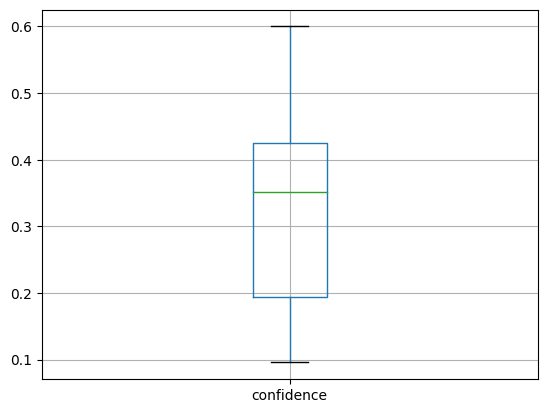

In [50]:
rules_c[['confidence']].boxplot()

### 2.4.2 Using Lift Threshold<a id="part2.4.2"></a>
[Back to top](#top)

In [79]:
rules_l = association_rules(frequent_itemsets, metric="lift", min_threshold=30)
rules_l

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(sprite),(icon),0.0142,0.0126,0.0054,0.380282,30.181087,0.005221,1.593305,0.980794
1,(icon),(sprite),0.0126,0.0142,0.0054,0.428571,30.181087,0.005221,1.725150,0.979205
2,(https),(com),0.0106,0.0072,0.0042,0.396226,55.031447,0.004124,1.644325,0.992347
3,(com),(https),0.0072,0.0106,0.0042,0.583333,55.031447,0.004124,2.374560,0.988949
4,(youtube),(watch),0.0070,0.0102,0.0042,0.600000,58.823529,0.004129,2.474500,0.989930
5,(watch),(youtube),0.0102,0.0070,0.0042,0.411765,58.823529,0.004129,1.688100,0.993130


<Axes: >

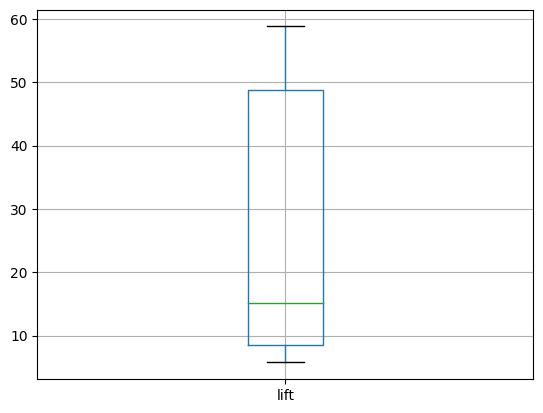

In [53]:
rules_l[['lift']].boxplot()

### 2.4.3 Using both lift and confidence thresholds<a id="part2.4.3"></a>
[Back to top](#top)

In [82]:
# Option A
rules_l_c = rules_c[ (rules_c['lift'] >= 30) & (rules_c['confidence'] >= 0.4) ]
rules_l_c.sort_values('confidence', ascending = False, inplace = True)
rules_l_c

C:\Users\ambkr\AppData\Local\Temp\ipykernel_41668\3977003151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_l_c.sort_values('confidence', ascending = False, inplace = True)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(youtube),(watch),0.0070,0.0102,0.0042,0.600000,58.823529,0.004129,2.47450,0.989930
2,(com),(https),0.0072,0.0106,0.0042,0.583333,55.031447,0.004124,2.37456,0.988949
1,(icon),(sprite),0.0126,0.0142,0.0054,0.428571,30.181087,0.005221,1.72515,0.979205
4,(watch),(youtube),0.0102,0.0070,0.0042,0.411765,58.823529,0.004129,1.68810,0.993130


# Problem2

## 3. Classification Modeling<a id="part3"></a>
[Back to top](#top)

### 3.1 Sample the data<a id="part3.1"></a>
[Back to top](#top)

In [55]:
df

,text,category,cleansed_review,keywords
0,This is just an hypothesis on how I imagine an...,soccer,this is just an hypothesis on how i imagine an...,"{'fc': 0.578, 'league': 0.371, 'teams': 0.277,..."
1,"Hey community, I want to get your opinion on w...",snowboarding,hey community i want to get your opinion on wh...,"{'vail': 0.482, 'beaver': 0.277, 'creek': 0.25..."
2,I have a roubaix road bike with aero bars and ...,triathlon,i have a roubaix road bike with aero bars and ...,"{'pros': 0.352, 'helmet': 0.323, 'opportunity'..."
3,Out of the u17 World Cup winners “top prospect...,soccer,out of the u world cup winners top prospects w...,"{'careers': 0.412, 'nelson': 0.279, 'winners':..."
4,A while ago I quit Judo and since then I've da...,judo,a while ago i quit judo and since then i ve da...,"{'judo': 0.435, 'submissions': 0.26, 'lastly':..."
...,...,...,...,...
4995,"Hey, do you guys have any recommendations for ...",surfing,hey do you guys have any recommendations for h...,"{'walking': 0.446, 'hostels': 0.286, 'puerto':..."
4996,**FT: Manchester United 4 - 0 Wigan Athletic**...,soccer,ft manchester united wigan athletic fellaini ...,"{'bbc': 0.455, 'streamable': 0.382, 'https': 0..."
4997,#[](#sprite1-p6) FC Barcelona <lb><lb><lb><lb>...,soccer,sprite p fc barcelona season w d l gd points ...,"{'cf': 0.533, 'dropped': 0.3, 'gd': 0.23, 'spr..."
4998,"BLUF: Riding a combo of an 8'6"" Longboard and...",surfing,bluf riding a combo of an longboard and a big ...,"{'ns': 0.288, 'ci': 0.271, 'forgiving': 0.271,..."


In [56]:
X1 = text_counts.toarray()
y = df['category'].map( {'soccer': 0, 'snowboarding': 1, 'triathlon': 2, 'judo': 3, 'surfing': 4} ).astype(int)

In [57]:
#Text Counts

# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%) 
# Set the random state as 2
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y,test_size=0.3, random_state=42)

In [58]:
X2 = text_tfidf.toarray()

In [59]:
#Text TF-IDF

# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%) 
# Set the random state as 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y,test_size=0.3, random_state=42)

### 3.2 Build the Model(s)<a id="part3.2"></a>
[Back to top](#top)

In [60]:
# Build model 1
lg1 = LogisticRegression()
lg1.fit(X1_train, y1_train)

LogisticRegression()

In [61]:
# Build model 2
lg2 = LogisticRegression()
lg2.fit(X2_train, y2_train)

LogisticRegression()

### 3.3 Evaluate and Improve the Model(s)<a id="part3.3"></a>
[Back to top](#top)

In [62]:
# Create a function to calculate and print the training and testing accuracy scores
def print_scores(model, xtrain, ytrain, xtest, ytest):
    # Training data
    train_score = model.score(xtrain, ytrain)
    train_cv = cross_val_score(model, xtrain, ytrain, cv=5).mean()
    print(f'Training accuracy: {train_score:.3f}')
    print(f'Training cross-validation accuracy: {train_cv:.3f}')
    
    # Testing data
    test_score = model.score(xtest, ytest)
    test_cv = cross_val_score(model, xtest, ytest, cv=5).mean()
    print(f'\nTesting accuracy: {test_score:.3f}')
    print(f'Testing cross-validation accuracy: {test_cv:.3f}')
    
    #Classification Report
    y_pred = model.predict(xtest)
    print('Classification Report:')
    print(classification_report(ytest, y_pred))

### 3.3.1 Text Counts<a id="part3.3.1"></a>
[Back to top](#top)

In [63]:
# Calculate scores for model 1
print('Model using CountVectorier\n')
print_scores(lg1, X1_train, y1_train, X1_test, y1_test)

Model using CountVectorier

Training accuracy: 1.000
Training cross-validation accuracy: 0.958

Testing accuracy: 0.957
Testing cross-validation accuracy: 0.932
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       320
           1       0.91      0.95      0.93       292
           2       0.97      0.97      0.97       294
           3       0.98      0.95      0.96       292
           4       0.95      0.94      0.94       302

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500



In [64]:
# Create parameter grid
param_grid = {'max_iter': [50, 75, 100, 125],
              'C': [0.5 ,0.75, 1, 1.25],
              'multi_class': ['auto','ovr','multinomial'],
              'solver':['newton-cg','lbfgs','liblinear']
             }

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X1_train, y1_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

C:\Users\ambkr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ambkr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best cross-validation score: 0.96
Best parameters:  {'C': 0.5, 'max_iter': 50, 'multi_class': 'auto', 'solver': 'liblinear'}


In [65]:
# Build improved model 1 
improved_lg1 = LogisticRegression(C=0.5, max_iter=50, solver='liblinear')
improved_lg1.fit(X1_train, y1_train)

LogisticRegression(C=0.5, max_iter=50, solver='liblinear')

In [66]:
# Calculate scores for improved model 1
print('Improved Model using CountVectorier\n')
print_scores(improved_lg1, X1_train, y1_train, X1_test, y1_test)

Improved Model using CountVectorier

Training accuracy: 1.000
Training cross-validation accuracy: 0.962

Testing accuracy: 0.960
Testing cross-validation accuracy: 0.941
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       320
           1       0.92      0.96      0.94       292
           2       0.97      0.97      0.97       294
           3       0.98      0.95      0.96       292
           4       0.96      0.94      0.95       302

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500



In [67]:
y1_pred = improved_lg1.predict(X1_test)
y1_pred

array([2, 4, 1, ..., 0, 0, 0])

Text(0.5, 1.0, 'Confusion Matrix')

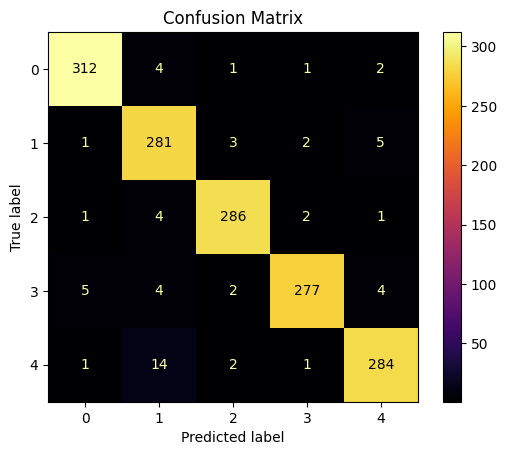

In [68]:
c="inferno"

# Create the confusion matrix display with custom colors
disp = ConfusionMatrixDisplay.from_predictions(y1_test, y1_pred, cmap=c)
plt.title("Confusion Matrix")
#plt.show()

### 3.3.2 Text TF-IDF<a id="part3.3.2"></a>
[Back to top](#top)

In [69]:
# Calculate scores for model 2
print('Model using TF-IDF\n')
print_scores(lg2, X2_train, y2_train, X2_test, y2_test)

Model using TF-IDF

Training accuracy: 0.996
Training cross-validation accuracy: 0.969

Testing accuracy: 0.965
Testing cross-validation accuracy: 0.947
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       320
           1       0.93      0.97      0.95       292
           2       0.98      0.96      0.97       294
           3       0.98      0.97      0.97       292
           4       0.98      0.94      0.96       302

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



In [70]:
# Create parameter grid
param_grid = {'max_iter': [50, 75, 100, 125],
              'C': [0.5 ,0.75, 1, 1.25],
              'multi_class': ['auto','ovr','multinomial'],
              'solver':['newton-cg','lbfgs','liblinear']
             }

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X2_train, y2_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

C:\Users\ambkr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ambkr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ambkr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ambkr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best cross-validation score: 0.97
Best parameters:  {'C': 1.25, 'max_iter': 50, 'multi_class': 'ovr', 'solver': 'newton-cg'}


In [71]:
# Build improved model 2
improved_lg2 = LogisticRegression(C=1.25,max_iter=50,multi_class='ovr', solver='newton-cg')
improved_lg2.fit(X2_train, y2_train)

LogisticRegression(C=1.25, max_iter=50, multi_class='ovr', solver='newton-cg')

In [72]:
# Calculate scores for model 2
print('Improved Model using TF-IDF\n')
print_scores(improved_lg2, X2_train, y2_train, X2_test, y2_test)

Improved Model using TF-IDF

Training accuracy: 0.995
Training cross-validation accuracy: 0.970

Testing accuracy: 0.967
Testing cross-validation accuracy: 0.946
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       320
           1       0.94      0.97      0.95       292
           2       0.98      0.96      0.97       294
           3       0.98      0.97      0.97       292
           4       0.98      0.94      0.96       302

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



In [73]:
y2_pred = improved_lg1.predict(X2_test)
y2_pred

array([2, 4, 1, ..., 0, 0, 0])

Text(0.5, 1.0, 'Confusion Matrix')

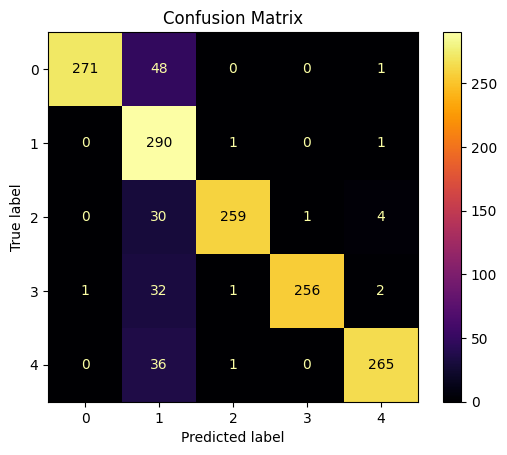

In [74]:
c="inferno"

# Create the confusion matrix display with custom colors
disp = ConfusionMatrixDisplay.from_predictions(y2_test, y2_pred, cmap=c)
plt.title("Confusion Matrix")
#plt.show()